In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
# Read in the data
df = pd.read_csv('../data/data_daily.csv')

In [5]:
# Clean the column name and look at the first few rows
df.columns = ['date', 'receipt_count']
df.head()

,date,receipt_count
0,2021-01-01,7564766
1,2021-01-02,7455524
2,2021-01-03,7095414
3,2021-01-04,7666163
4,2021-01-05,7771289


## Data Description

In [6]:
# Check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           365 non-null    object
 1   receipt_count  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [8]:
# Look at the summary statistics
df.describe()

,receipt_count
count,3.650000e+02
mean,8.826566e+06
std,7.820089e+05
min,7.095414e+06
25%,8.142874e+06
50%,8.799249e+06
75%,9.476970e+06
max,1.073886e+07


In [9]:
# Check for missing values
df.isnull().sum()

date             0
receipt_count    0
dtype: int64

We have 365 rows and 2 columns in our dataset. Both the columns `does not` contain any `missing values`. The minimum count of receipts is roughly 7 million and maximum is roughly 10 million for the year 2021.

## Data Visualization

In [12]:
# Convert the date column to datetime
df['date'] = pd.to_datetime(df['date'])

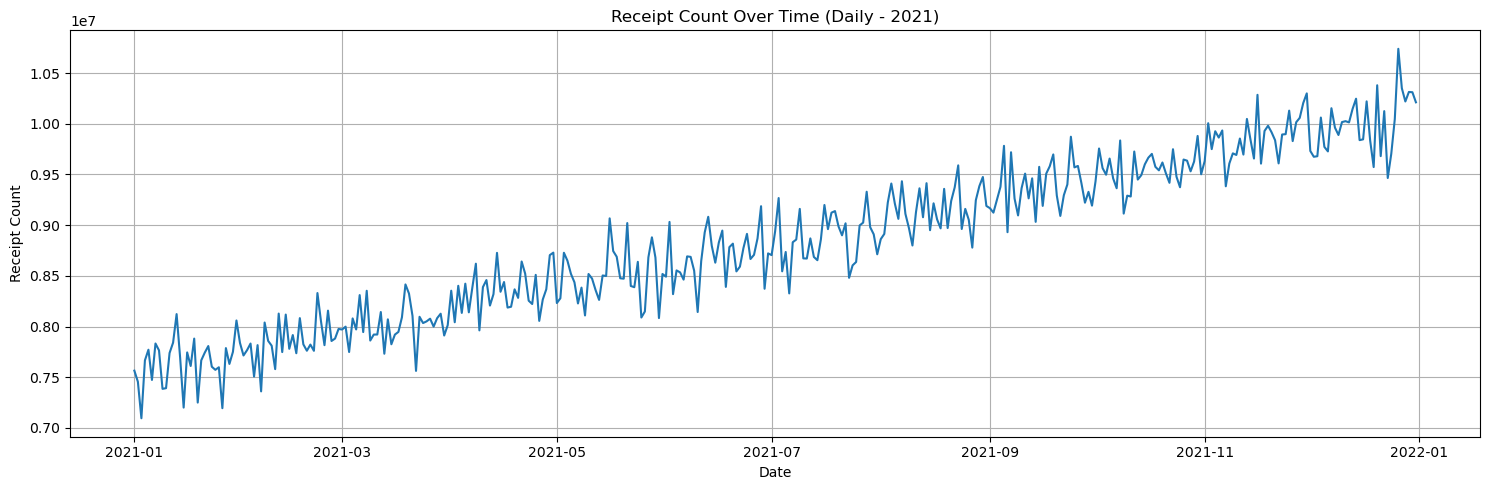

In [15]:
plt.figure(figsize=(15, 5))
plt.plot(df.date, df.receipt_count)
plt.title('Receipt Count Over Time (Daily - 2021)')
plt.xlabel('Date')
plt.ylabel('Receipt Count')
plt.grid(True)
plt.tight_layout()
plt.show()

We find:
- There seems to be a consistent fluctuation, potentially indicating weekly seasonality.
- We can immediately observe a upward trend in the data.
- There aren't any apparent anomalies or outliers at first glance.

In [16]:
# Extract the month and day from the date column
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

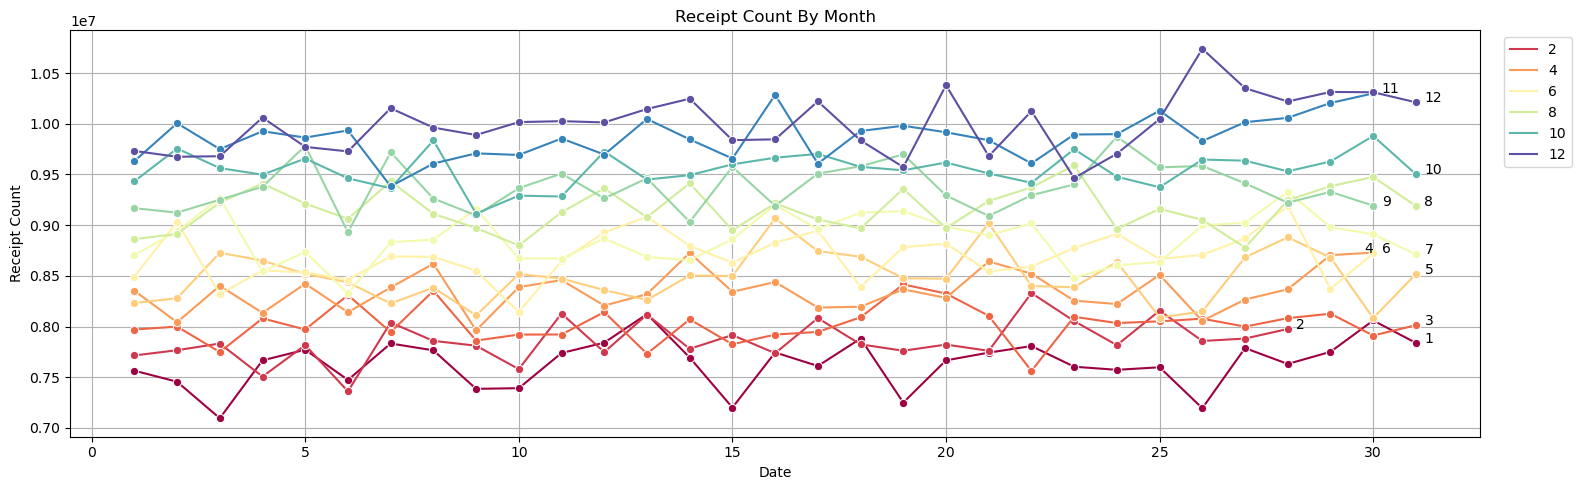

In [69]:
plt.figure(figsize=(15, 5))
sns.lineplot(x='day', y='receipt_count', hue='month', data=df, marker='o', palette="Spectral")
plt.xlabel('Date')
plt.ylabel('Receipt Count')
plt.title('Receipt Count By Month')
plt.grid(True)
plt.tight_layout()
plt.legend(loc='upper right', bbox_to_anchor=(1.07, 1))
for month in df['month'].unique():
    x = df[df['month'] == month]['day']
    y = df[df['month'] == month]['receipt_count']
    if month == 4:
        plt.annotate(month, xy=(x.iloc[-1] - 0.2, y.iloc[-1]))
    else:
        plt.annotate(month, xy=(x.iloc[-1] + 0.2, y.iloc[-1]))
plt.show()

We find:
- Usually the number of receipts at the start of each month is greater than the previous month.
- There aren't much huge fluctuations in the data.
- There aren't any apparent anomalies or outliers at first glance.

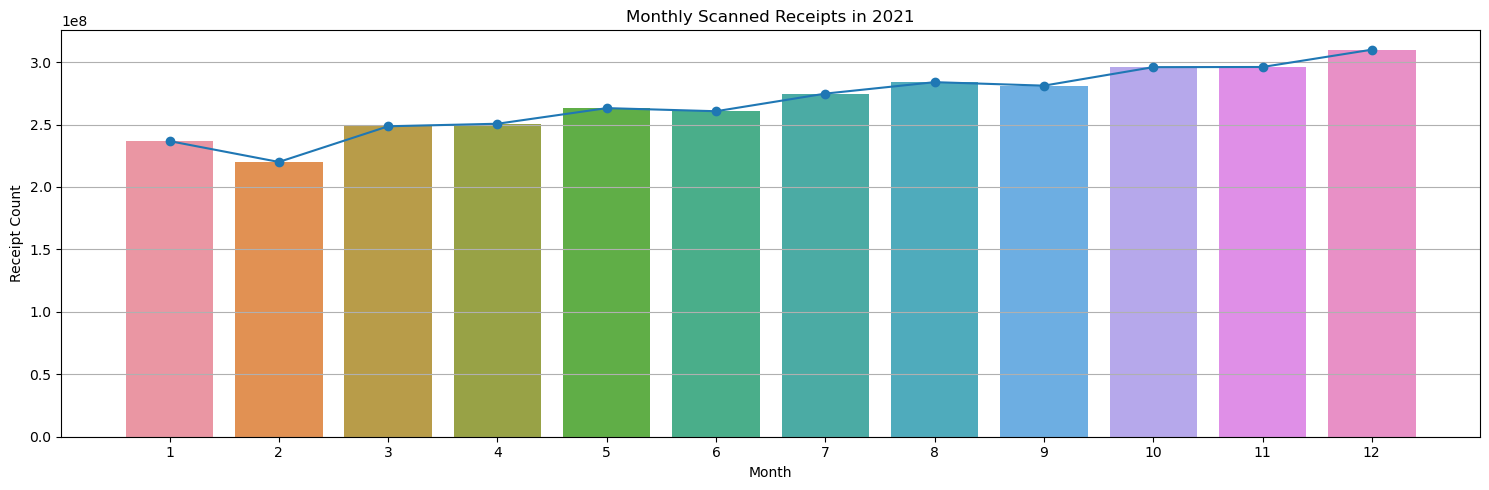

In [142]:
# Aggregate data on a monthly basis
monthly_data = df.groupby('month').sum()

# Plotting the monthly aggregated data
plt.figure(figsize=(15, 5))
sns.barplot(x=monthly_data.index, y=monthly_data['receipt_count'])
plt.plot(monthly_data.index - 1, monthly_data['receipt_count'], marker='o')
plt.title('Monthly Scanned Receipts in 2021')
plt.xlabel('Month')
plt.ylabel('Receipt Count')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


The monthly aggregation provides a clearer view of the fluctuations throughout the year. Some months have higher receipt counts than others, but the differences aren't drastic.

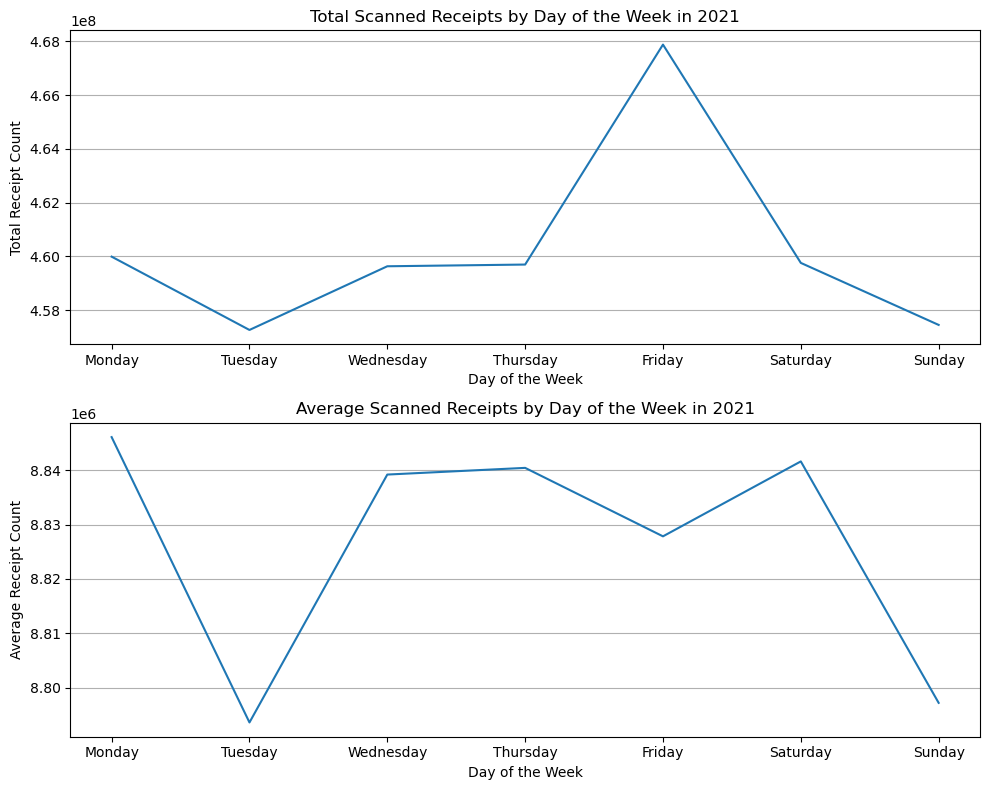

In [137]:
# Extract day of the week from the 'date' column and calculate the total receipt count for each day
df['day_of_week'] = df['date'].dt.day_name()
weekly_data = df.groupby('day_of_week').agg(['sum', 'mean'])

# Order the days for plotting
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_data = weekly_data.reindex(order)

# Plotting the total receipt counts for each day of the week
fig, axes = plt.subplots(2,1, figsize=(10, 8))
sns.lineplot(x=weekly_data.index, y=weekly_data.receipt_count['sum'], ax=axes[0])
axes[0].set_title('Total Scanned Receipts by Day of the Week in 2021', )
axes[0].set_xlabel('Day of the Week')
axes[0].set_ylabel('Total Receipt Count')
axes[0].grid(axis='y')

sns.lineplot(x=weekly_data.index, y=weekly_data.receipt_count['mean'], ax=axes[1])
axes[1].set_title('Average Scanned Receipts by Day of the Week in 2021', )
axes[1].set_xlabel('Day of the Week')
axes[1].set_ylabel('Average Receipt Count')
axes[1].grid(axis='y')
plt.tight_layout()
plt.show()

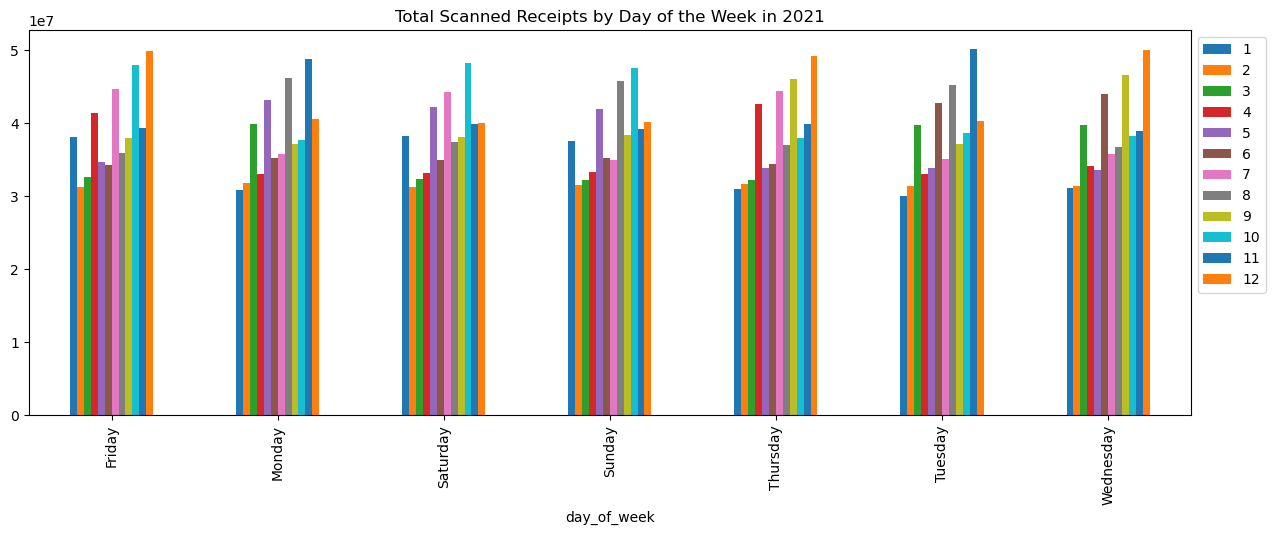

In [187]:
df['day_of_week'] = df['date'].dt.day_name()
weekly_data = df.groupby(['day_of_week', 'month']).agg(['sum', 'mean'])

weekly_data.unstack().receipt_count['sum'].plot(kind='bar', figsize=(15, 5))
plt.legend(loc='upper right', bbox_to_anchor=(1.07, 1))
plt.title('Total Scanned Receipts by Day of the Week in 2021') 
plt.show()

In [150]:
weekly_ma_data = df.copy()
weekly_ma_data['MA3'] = weekly_ma_data.receipt_count.rolling(window=3).mean()
weekly_ma_data['MA5'] = weekly_ma_data.receipt_count.rolling(window=5).mean()
weekly_ma_data['MA7'] = weekly_ma_data.receipt_count.rolling(window=7).mean()

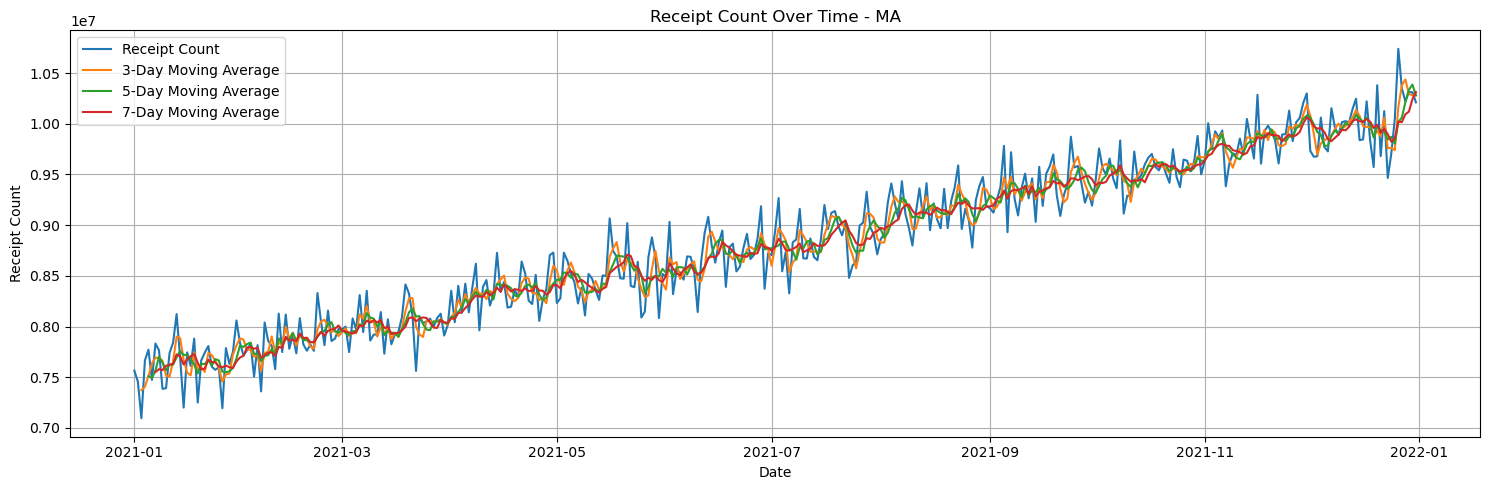

In [152]:
plt.figure(figsize=(15, 5))
plt.plot(weekly_ma_data.date, weekly_ma_data.receipt_count, label='Receipt Count')
plt.plot(weekly_ma_data.date, weekly_ma_data.MA3, label='3-Day Moving Average')
plt.plot(weekly_ma_data.date, weekly_ma_data.MA5, label='5-Day Moving Average')
plt.plot(weekly_ma_data.date, weekly_ma_data.MA7, label='7-Day Moving Average')
plt.title('Receipt Count Over Time - MA')
plt.xlabel('Date')
plt.ylabel('Receipt Count')
plt.grid(True)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()